### 당뇨병 예측을 위한 딥러닝

In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('dataset/pima-indians-diabetes.csv', 
#                names=['pregnant','plasma','pressure','thickness','insulin',
#                        'BMI','pedigree','age','class'])

df = pd.read_csv('dataset/pima-indians-diabetes.csv',
                 names = ["임신회수", "혈당", "혈압", "피부두께", 
                          "인슐린", "BMI", "가족력", "나이", "class"])

In [3]:
df.head(5)

,임신회수,혈당,혈압,피부두께,인슐린,BMI,가족력,나이,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   임신회수    768 non-null    int64  
 1   혈당      768 non-null    int64  
 2   혈압      768 non-null    int64  
 3   피부두께    768 non-null    int64  
 4   인슐린     768 non-null    int64  
 5   BMI     768 non-null    float64
 6   가족력     768 non-null    float64
 7   나이      768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,임신회수,혈당,혈압,피부두께,인슐린,BMI,가족력,나이,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['임신회수','class']]

,임신회수,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [7]:
df[['임신회수','class']].groupby(['임신회수'], 
                             as_index=False).mean().sort_values(by='임신회수', ascending=True)

,임신회수,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


In [8]:
df[['인슐린','class']].groupby(['인슐린'], 
                             as_index=False).mean().sort_values(by='인슐린', ascending=True)

,인슐린,class
0,0,0.368984
1,14,1.000000
2,15,0.000000
3,16,0.000000
4,18,0.000000
...,...,...
181,579,1.000000
182,600,1.000000
183,680,0.000000
184,744,0.000000


In [9]:
df[['혈당','class']].groupby(['혈당'], 
                             as_index=False).mean().sort_values(by='혈당', ascending=True)

,혈당,class
0,0,0.40
1,44,0.00
2,56,0.00
3,57,0.00
4,61,0.00
...,...,...
131,195,1.00
132,196,1.00
133,197,0.75
134,198,1.00


#### 상관관계 그래프

In [10]:
import matplotlib.font_manager as fm
import matplotlib

In [11]:
font_location = 'c:/windows/fonts/HMFMMUEX.TTC'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user12\anaconda3\envs\ai\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user12\anaconda3\envs\ai\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


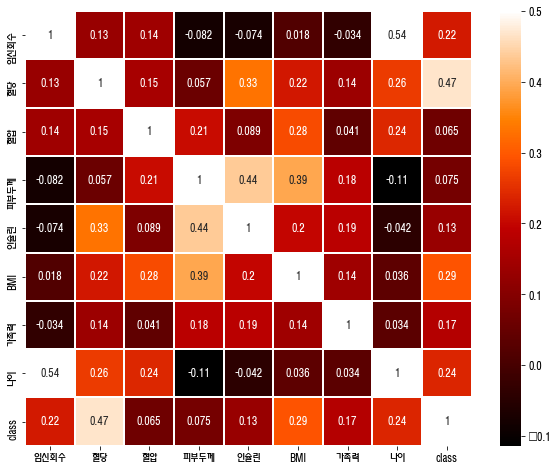

In [13]:
colormap = plt.cm.gist_heat  # 색상 구성
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), linewidth=0.1, vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

<AxesSubplot:title={'center':'Diabetes of pima indians'}>

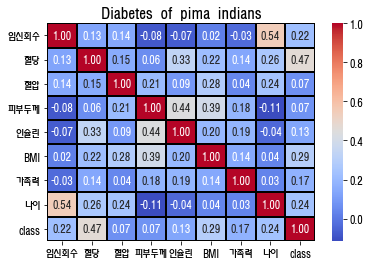

In [14]:
plt.title('Diabetes of pima indians', fontsize=14)
sns.heatmap(df.corr(), linewidths=0.2, vmax=1.0, cmap='coolwarm', linecolor='black', fmt='.2f',
           annot=True, yticklabels=True)

<AxesSubplot:title={'center':'피마 인디언의 당뇨병 현황'}>

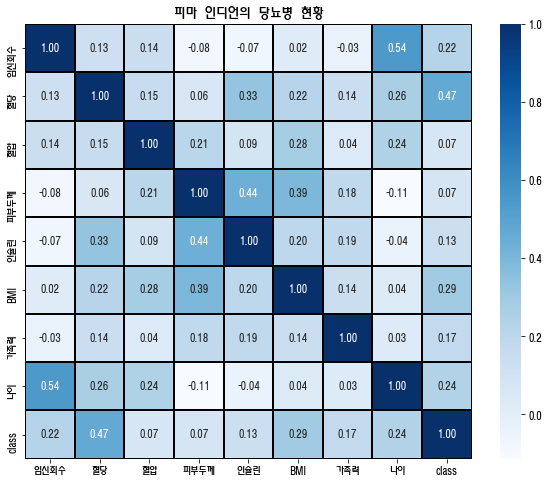

In [15]:
plt.figure(figsize=(10,8))
plt.title('피마 인디언의 당뇨병 현황', fontsize=14)
sns.heatmap(df.corr(), linewidths=0.2, vmax=1.0, cmap='Blues', linecolor='black', fmt='.2f',annot=True)

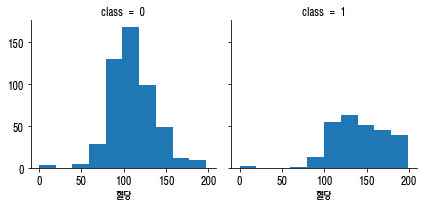

In [16]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, '혈당', bins=10)  # bins : 그래프 넓이(몇개의 구간으로 나눌 것인지)
plt.show()